# Multiple Linear Regression 😎

### Objective: To predict Profit of a Company based on R&D Spend, Administration, Marketing Spend and State 📶

### Importing Libraries

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

### Loading Dataset

In [2]:
data = pd.read_csv('1000_Companies.csv')

### Exploratory Analysis

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
print('Shape: ', data.shape)

Shape:  (1000, 5)


In [5]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [7]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Correlation Analysis

In [8]:
data.corr()['Profit']

R&D Spend          0.945245
Administration     0.741560
Marketing Spend    0.917270
Profit             1.000000
Name: Profit, dtype: float64

#### Scatter Plot of Profit vs R&D Spending

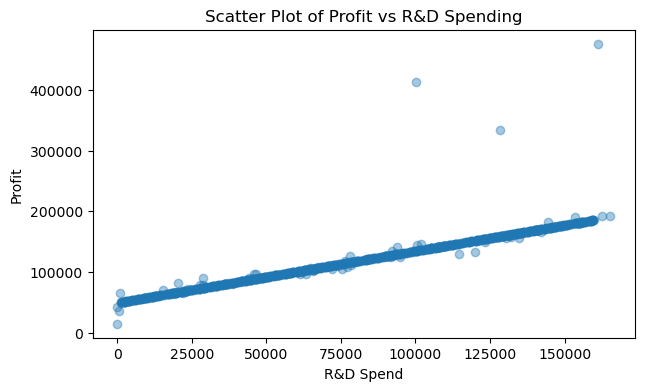

In [9]:
plt.figure(figsize=(7,4))
plt.scatter(data['R&D Spend'], data['Profit'], alpha=0.4)
plt.title('Scatter Plot of Profit vs R&D Spending')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

plt.show()

#### Scatter Plot of Profit vs Marketing Spending

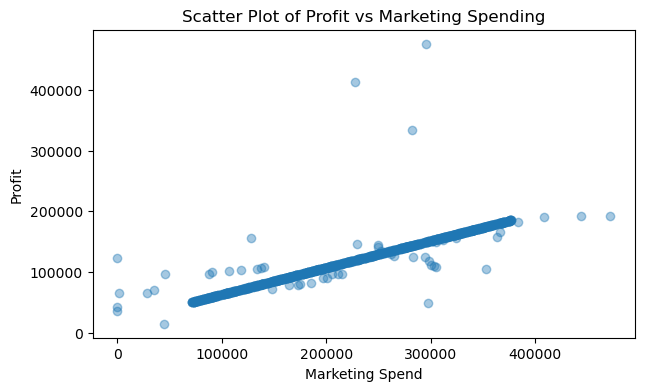

In [10]:
plt.figure(figsize=(7, 4))
plt.scatter(data['Marketing Spend'], data['Profit'], alpha=0.4)
plt.title('Scatter Plot of Profit vs Marketing Spending')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

#### Scatter Plot of Profit vs Administration

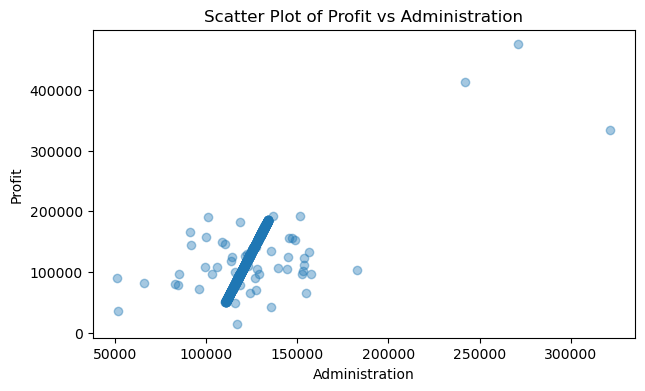

In [11]:
plt.figure(figsize=(7, 4))
plt.scatter(data['Administration'], data['Profit'], alpha=0.4)
plt.title('Scatter Plot of Profit vs Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.show()

#### State

In [12]:
data.State.value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

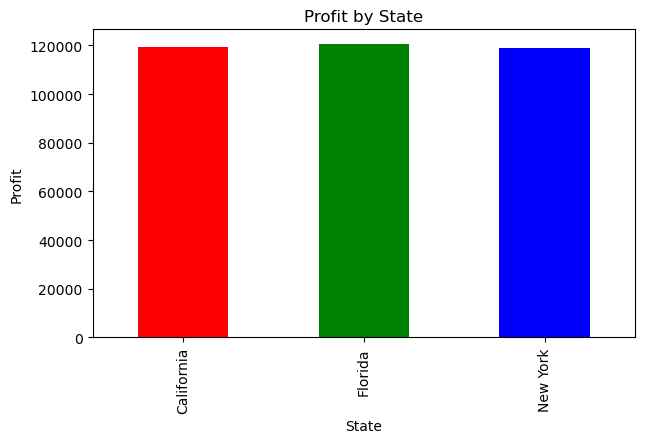

In [13]:
data.groupby(data['State'])['Profit'].mean().plot.bar(figsize=(7, 4), color=['red', 'green', 'blue'])
plt.ylabel('Profit')
plt.title('Profit by State');

### Data Clean Up

#### Outliers

In [14]:
data[data['Profit'] > 300000]

,R&D Spend,Administration,Marketing Spend,State,Profit
997,100275.47,241926.31,227142.82,California,413956.48
998,128456.23,321652.14,281692.32,California,333962.19
999,161181.72,270939.86,295442.17,New York,476485.43


In [15]:
data['Diff'] = np.abs(data['Profit'] - data['Profit'].mean())

In [16]:
data.nlargest(n=3, columns=['Diff'])

,R&D Spend,Administration,Marketing Spend,State,Profit,Diff
999,161181.72,270939.86,295442.17,New York,476485.43,356939.265344
997,100275.47,241926.31,227142.82,California,413956.48,294410.315344
998,128456.23,321652.14,281692.32,California,333962.19,214416.025344


In [17]:
data.shape

(1000, 6)

In [18]:
data.drop(data.nlargest(n=3, columns=['Diff']).index, inplace=True)

In [19]:
data.shape

(997, 6)

In [20]:
data.drop(columns=['Diff'], axis=1, inplace=True)

#### Duplicates

In [21]:
data[data.duplicated(keep=False)]

,R&D Spend,Administration,Marketing Spend,State,Profit
335,84533.0,122941.3141,231885.6935,California,121248.7116
755,84533.0,122941.3141,231885.6935,California,121248.7116


In [22]:
data.shape

(997, 5)

In [23]:
data.drop(data[data.duplicated(keep='first')].index, inplace=True)

In [24]:
data.shape

(996, 5)

### Encoding Categorical variables

In [25]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [26]:
data['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [27]:
data['New York'] = np.where(data['State'] == 'New York', 1, 0)
data['California'] = np.where(data['State'] == 'California', 1, 0)
data['Florida'] = np.where(data['State'] == 'Florida', 1, 0)
data.drop(columns=['State'], inplace=True)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,New York,California,Florida
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


#### Dummy variable trap escape (removing redundant column)

In [28]:
data.drop(columns=['Florida'], inplace=True)

### Dependent & Independent Variables

In [29]:
dependent = 'Profit'
independent = data.columns.to_list()
independent.remove(dependent)
print('Dependent Variable:', dependent)
print('Independent Variable: ', independent)

Dependent Variable: Profit
Independent Variable:  ['R&D Spend', 'Administration', 'Marketing Spend', 'New York', 'California']


In [30]:
X = data[independent].values
y = data[dependent]
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (996, 5)
y shape: (996,)


### Splitting Train & Test Data Sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, shuffle=True)

In [32]:
print('Trainning Set:', X_train.shape, y_train.shape)
print('Testing Set:', X_test.shape, y_test.shape)

Trainning Set: (796, 5) (796,)
Testing Set: (200, 5) (200,)


### Scaling Down Features

In [33]:
scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [34]:
X_train_s[0]

array([0.84173978, 0.60693796, 0.71500748, 0.        , 1.        ])

### Trainning

In [35]:
model = LinearRegression()
model.fit(X_train_s, y_train)

LinearRegression()

### Predicting

In [36]:
y_prediction = model.predict(X_test_s)

### Evaluation

In [37]:
print('Mean Squred Error:', mean_squared_error(y_test, y_prediction))
print('r2 Score:', r2_score(y_test, y_prediction))

Mean Squred Error: 1076213.626838765
r2 Score: 0.9993511720312083


### Actual vs Prediction

In [38]:
prediction = pd.DataFrame({'Actual': y_test, 'Prediction': y_prediction})

In [39]:
prediction.reset_index(inplace=True)

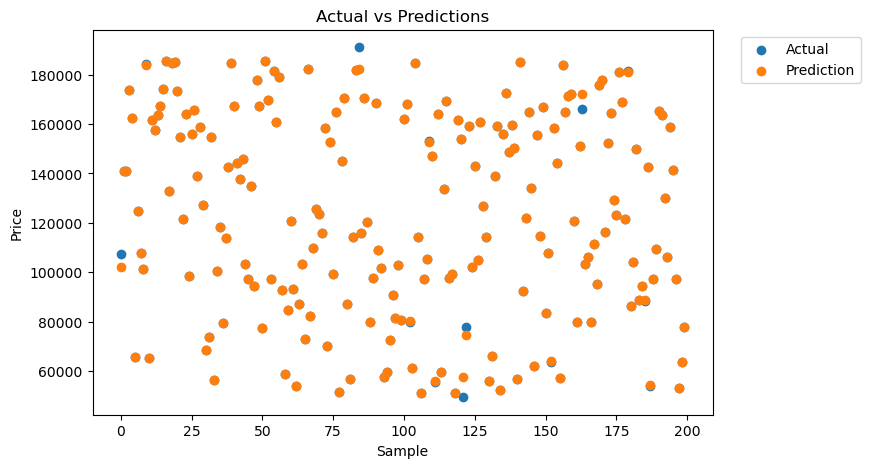

In [40]:
plt.figure(figsize=(8,5))
plt.title('Actual vs Predictions')
plt.scatter(prediction.index, prediction['Actual'], label='Actual')
plt.scatter(prediction.index, prediction['Prediction'], label='Prediction')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')
plt.show();

In [41]:
prediction['Difference'] = np.abs(prediction['Actual'] - prediction['Prediction'])

In [42]:
prediction.nlargest(5, columns=['Difference'])

,index,Actual,Prediction,Difference
84,2,191050.39,182130.558569,8919.831431
121,46,49490.75,57552.885430,8062.135430
163,4,166187.94,171950.595449,5762.655449
0,25,107404.34,102053.409268,5350.930732
122,41,77798.83,74846.998456,2951.831544


In [43]:
prediction.drop(prediction.nlargest(5, columns=['Difference']).index, inplace=True)

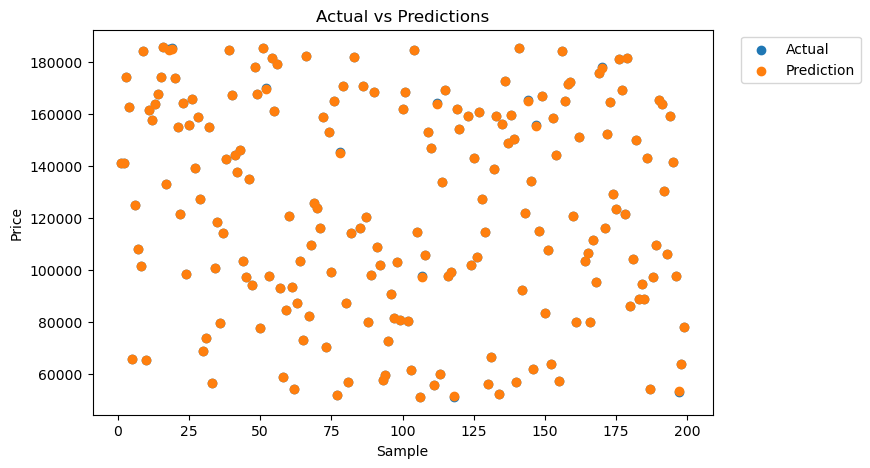

In [44]:
plt.figure(figsize=(8,5))
plt.title('Actual vs Predictions')
plt.scatter(prediction.index, prediction['Actual'], label='Actual')
plt.scatter(prediction.index, prediction['Prediction'], label='Prediction')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')
plt.show();